In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
df = pd.read_csv("D:\Data trained projects data set\DSData-master\happiness_score_dataset.csv")

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.shape

(158, 12)

In [28]:
df.isnull().sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
df = df.drop(columns = ['Country' , 'Region' , 'Happiness Rank'])

In [6]:
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


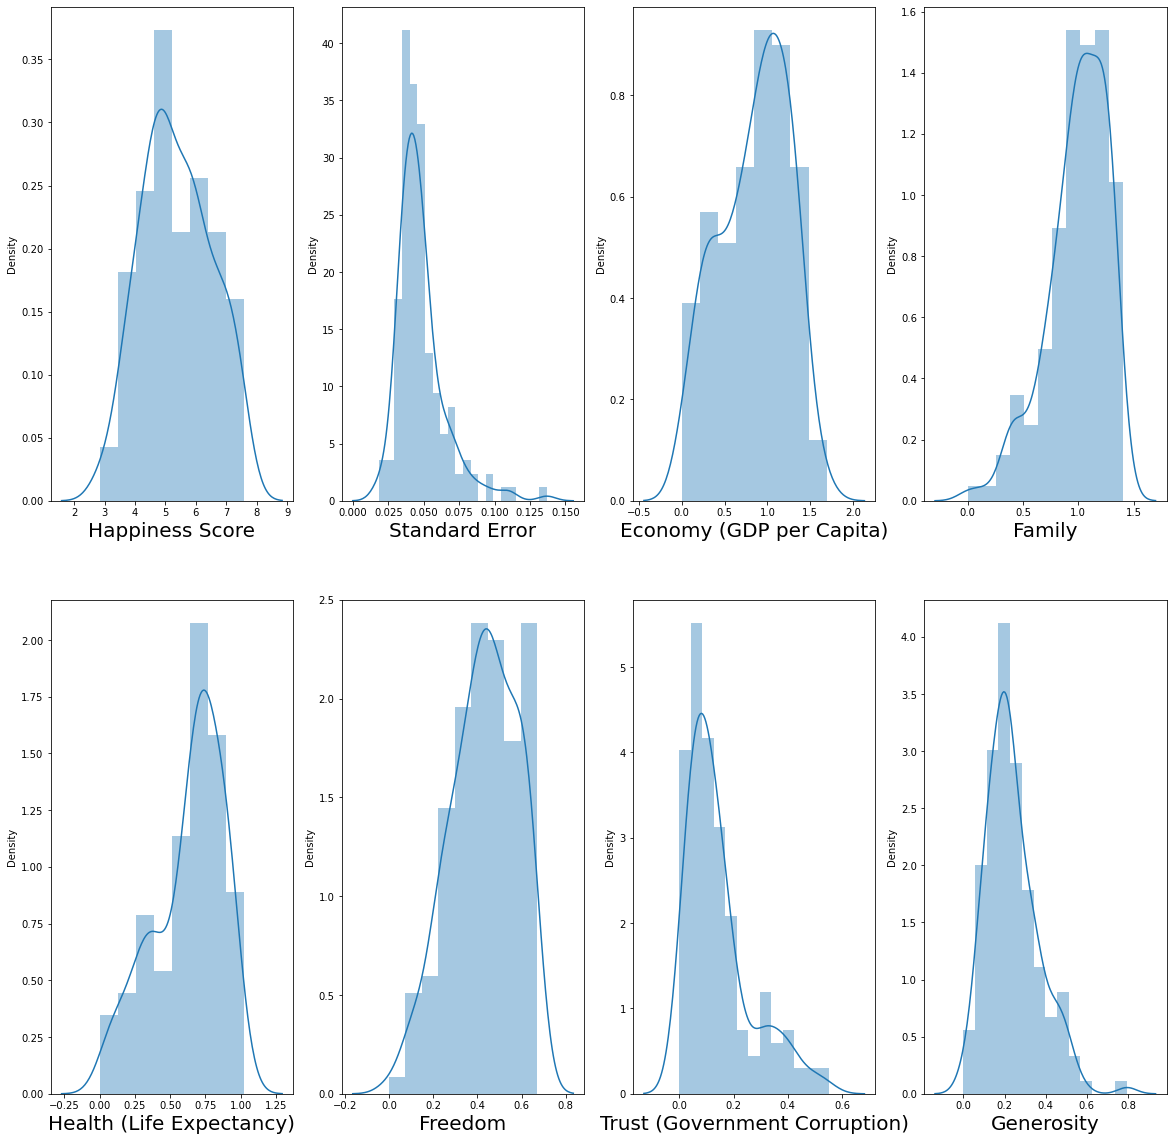

In [8]:
plt.figure(figsize = (20,20))
plt_num = 1

for column in df:
    if plt_num<=8:
        ax = plt.subplot(2,4,plt_num)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plt_num+=1
plt.show()

In [9]:
y = df['Happiness Score']
x = df.drop( columns = ['Happiness Score'])

In [10]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [11]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


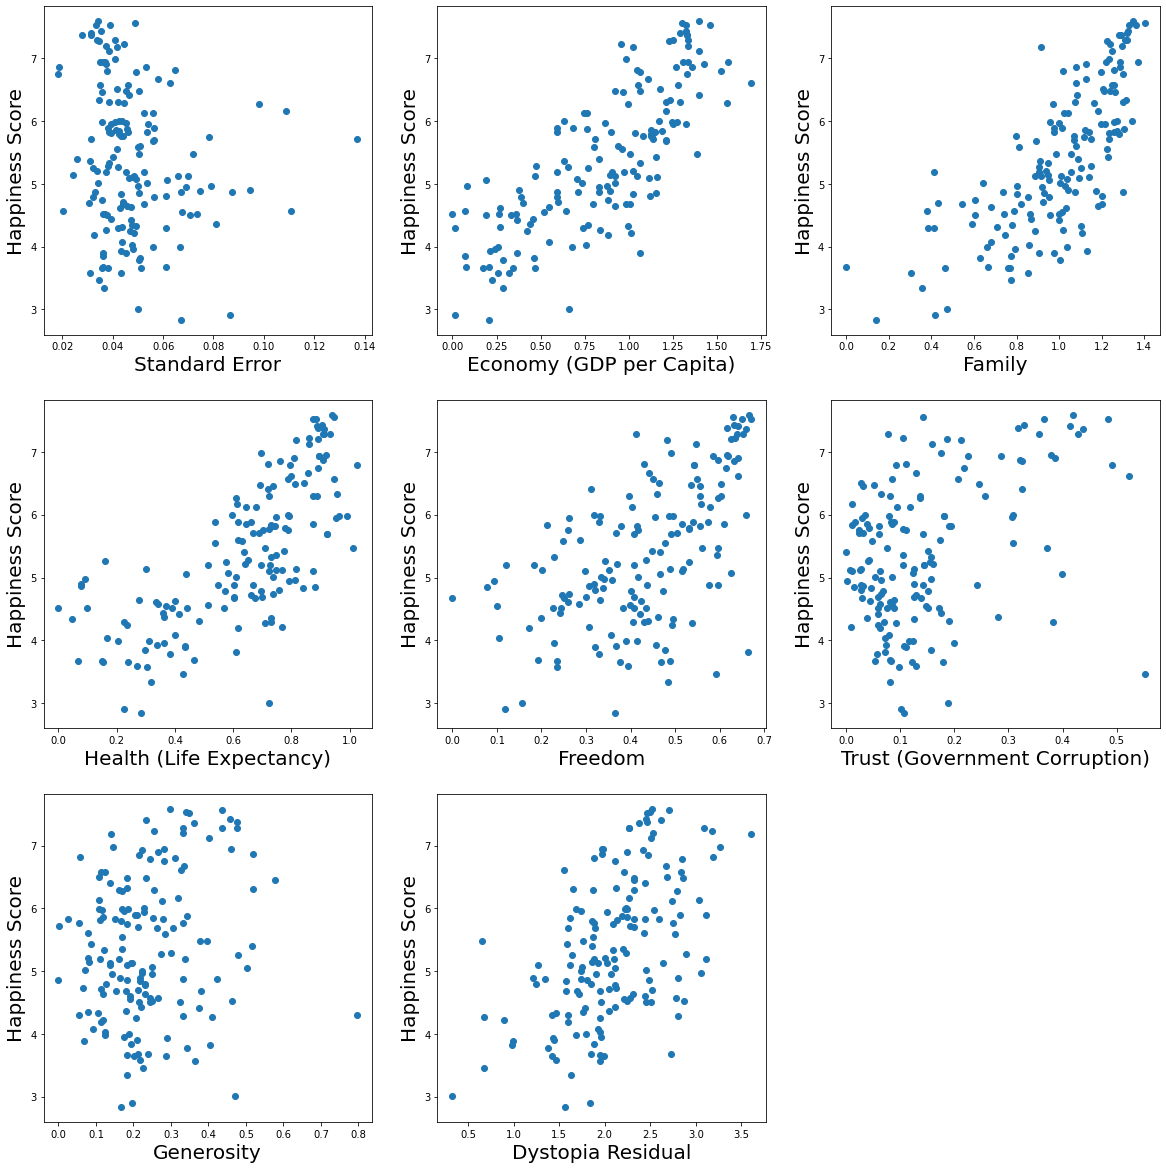

In [12]:
plt.figure(figsize = (20,35))
plt_num = 1

for column in x:
    if plt_num <=10:
        ax = plt.subplot(5,3,plt_num)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize = 20)
        plt.ylabel('Happiness Score',fontsize = 20)
    plt_num+=1
plt.show()

In [13]:
sca = StandardScaler()

In [14]:
x_scaled = sca.fit_transform(x)

In [15]:
x_scaled

array([[-0.80592569,  1.36962124,  1.32028142, ...,  2.30965159,
         0.47103971,  0.75825809],
       [ 0.05588945,  1.13522625,  1.51445776, ..., -0.01647953,
         1.57585637,  1.09285682],
       [-0.8544869 ,  1.19286069,  1.36105403, ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [ 0.13253425, -0.45524543, -1.90108634, ...,  0.38141902,
         1.85689094, -3.20843049],
       [ 2.26396166, -2.06756644, -2.1184666 , ..., -0.35771452,
        -0.31694987, -0.48198451],
       [ 1.13418227, -1.58633379, -3.13472485, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.30,random_state = 322)
y_train.head()

115    4.571
62     5.754
35     6.329
137    3.995
100    4.867
Name: Happiness Score, dtype: float64

In [17]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
df.tail(2)

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [19]:
print('Chances of predict', lr.predict(sca.transform([[2.6,5.7,55,67,6.8,5.8,7.8,55]])))

Chances of predict [203.10022778]


In [20]:
filename = 'World_health_report_model.pickle'
pickle.dump(lr,open(filename,'wb'))

In [21]:
lr.score(x_train,y_train)

0.999999951654641

In [22]:
lr.score(x_test,y_test)

0.9999999099963013

In [23]:
y_pred = lr.predict(x_test)

In [24]:
y_pred

array([6.48511486, 4.50720005, 3.84507331, 4.29667874, 4.51445128,
       4.35002602, 3.81922652, 5.95960307, 5.47371872, 5.28643515,
       4.87598324, 4.88448608, 5.12889052, 5.47698985, 5.19231321,
       5.69526923, 4.51715678, 5.05728496, 5.1404634 , 5.84765589,
       4.68552769, 5.77038221, 5.12314534, 6.94612465, 5.98707406,
       6.66967041, 4.85757519, 6.940186  , 7.19979494, 7.58686191,
       6.45467416, 4.79956996, 5.07329456, 4.36913946, 5.79060415,
       4.83922152, 4.3069855 , 4.25201794, 4.29252177, 5.09756255,
       3.57459766, 6.29468481, 4.21849504, 3.67779732, 6.12280511,
       6.93733472, 7.27770625, 7.11946202])

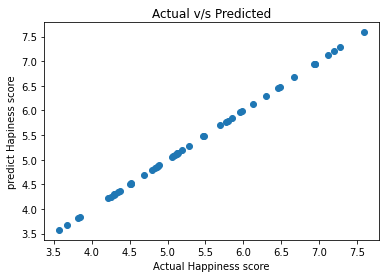

In [25]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Happiness score')
plt.ylabel('predict Hapiness score')
plt.title('Actual v/s Predicted')
plt.show()

In [26]:
print(classification_report,(y_test,y_pred))

<function classification_report at 0x00000285FBF089D0> (31     6.485
122    4.507
143    3.845
129    4.297
120    4.514
126    4.350
144    3.819
48     5.960
71     5.474
76     5.286
98     4.876
97     4.885
84     5.129
70     5.477
81     5.192
65     5.695
119    4.517
90     5.057
83     5.140
54     5.848
109    4.686
60     5.770
86     5.123
16     6.946
45     5.987
26     6.670
101    4.857
17     6.940
12     7.200
0      7.587
33     6.455
103    4.800
89     5.073
125    4.369
59     5.791
102    4.839
128    4.307
132    4.252
130    4.292
88     5.098
152    3.575
38     6.295
133    4.218
147    3.678
42     6.123
18     6.937
10     7.278
14     7.119
Name: Happiness Score, dtype: float64, array([6.48511486, 4.50720005, 3.84507331, 4.29667874, 4.51445128,
       4.35002602, 3.81922652, 5.95960307, 5.47371872, 5.28643515,
       4.87598324, 4.88448608, 5.12889052, 5.47698985, 5.19231321,
       5.69526923, 4.51715678, 5.05728496, 5.1404634 , 5.84765589,
       4.6855